<a href="https://colab.research.google.com/github/MelaniPrathibha/FizzBuzz/blob/main/MedScan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


KeyboardInterrupt: 

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d jayaprakashpondy/pills-dataset

 91% 123M/135M [00:01<00:00, 104MB/s] 
100% 135M/135M [00:01<00:00, 94.2MB/s]


In [ ]:
!unzip pills-dataset.zip


Archive:  pills-dataset.zip
  inflating: train/Amoxicillin 500 MG/Amoxicillin 500 MG (1) - Copy - Copy.jpg  
  inflating: train/Amoxicillin 500 MG/Amoxicillin 500 MG (1) - Copy.jpg  
  inflating: train/Amoxicillin 500 MG/Amoxicillin 500 MG (1).jpg  
  inflating: train/Amoxicillin 500 MG/Amoxicillin 500 MG (10) - Copy - Copy.jpg  
  inflating: train/Amoxicillin 500 MG/Amoxicillin 500 MG (10) - Copy.jpg  
  inflating: train/Amoxicillin 500 MG/Amoxicillin 500 MG (10).jpg  
  inflating: train/Amoxicillin 500 MG/Amoxicillin 500 MG (11) - Copy - Copy.jpg  
  inflating: train/Amoxicillin 500 MG/Amoxicillin 500 MG (11) - Copy.jpg  
  inflating: train/Amoxicillin 500 MG/Amoxicillin 500 MG (11).jpg  
  inflating: train/Amoxicillin 500 MG/Amoxicillin 500 MG (12) - Copy - Copy.jpg  
  inflating: train/Amoxicillin 500 MG/Amoxicillin 500 MG (12) - Copy.jpg  
  inflating: train/Amoxicillin 500 MG/Amoxicillin 500 MG (12).jpg  
  inflating: train/Amoxicillin 500 MG/Amoxicillin 500 MG (13) - Copy - Copy

In [ ]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [ ]:
train = './train'
valid = './valid'

In [ ]:
# List the directories and number of images in each directory
for i in os.listdir(train):
    j = os.path.join(train, i)
    if os.path.isdir(j):
        num_images = len(os.listdir(j))
        print(f"{i}: {num_images} images")


carvedilol 3.125 MG: 52 images
aprepitant 80 MG: 62 images
Calcitriol 0.00025 MG: 50 images
saxagliptin 5 MG: 44 images
celecoxib 200 MG: 46 images
mycophenolate mofetil 250 MG: 54 images
Ramipril 5 MG: 38 images
benzonatate 100 MG: 53 images
Amoxicillin 500 MG: 50 images
apixaban 2.5 MG: 52 images
duloxetine 30 MG: 50 images
Oseltamivir 45 MG: 50 images
pantoprazole 40 MG: 46 images
tadalafil 5 MG: 48 images
montelukast 10 MG: 48 images
pitavastatin 1 MG: 43 images
sitagliptin 50 MG: 52 images
eltrombopag 25 MG: 48 images
prasugrel 10 MG: 52 images
Atomoxetine 25 MG: 56 images


In [ ]:
for i in os.listdir(valid):
    j = os.path.join(valid, i)
    if os.path.isdir(j):
        num_images = len(os.listdir(j))
        print(f"{i}: {num_images} images")


carvedilol 3.125 MG: 14 images
aprepitant 80 MG: 15 images
Calcitriol 0.00025 MG: 12 images
saxagliptin 5 MG: 12 images
celecoxib 200 MG: 14 images
mycophenolate mofetil 250 MG: 13 images
Ramipril 5 MG: 12 images
benzonatate 100 MG: 13 images
Amoxicillin 500 MG: 20 images
apixaban 2.5 MG: 19 images
duloxetine 30 MG: 14 images
Oseltamivir 45 MG: 14 images
pantoprazole 40 MG: 13 images
tadalafil 5 MG: 12 images
montelukast 10 MG: 12 images
pitavastatin 1 MG: 13 images
sitagliptin 50 MG: 13 images
eltrombopag 25 MG: 12 images
prasugrel 10 MG: 13 images
Atomoxetine 25 MG: 14 images


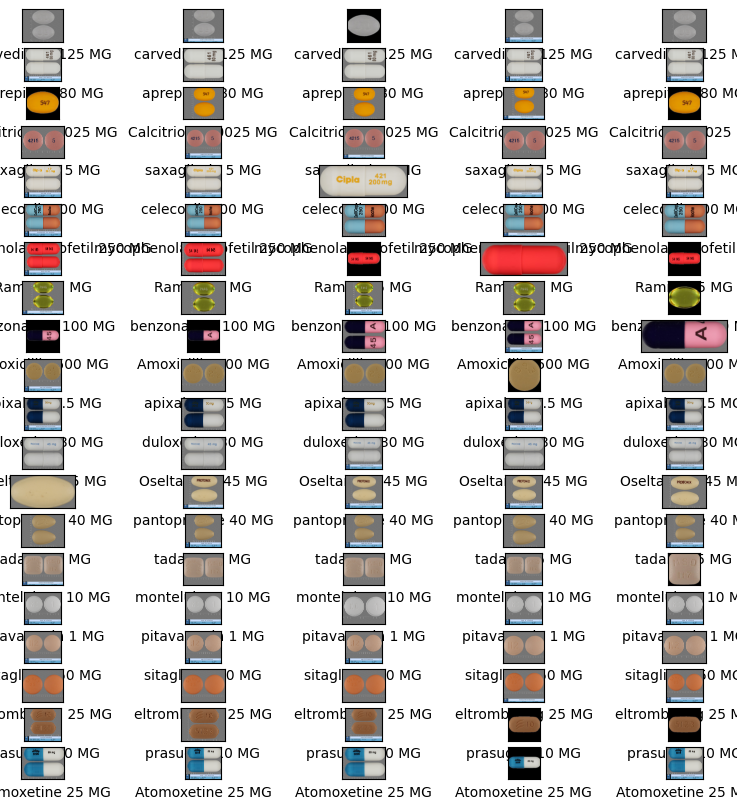

In [ ]:
def load_images_from_folder(folder, num_images=5):
    images = []
    for filename in os.listdir(folder)[:num_images]:
        img_path = os.path.join(folder, filename)
        try:
            with Image.open(img_path) as img:
                images.append(img.copy())
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    return images

# Preview images from each class
plt.figure(figsize=(10, 10))
for i, class_name in enumerate(os.listdir(train)):
    class_path = os.path.join(train, class_name)
    if os.path.isdir(class_path):
        images = load_images_from_folder(class_path, num_images=5)
        for j, img in enumerate(images):
            plt.subplot(len(os.listdir(train)), 5, i*5 + j + 1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.xlabel(class_name)
            plt.imshow(img)
plt.show()


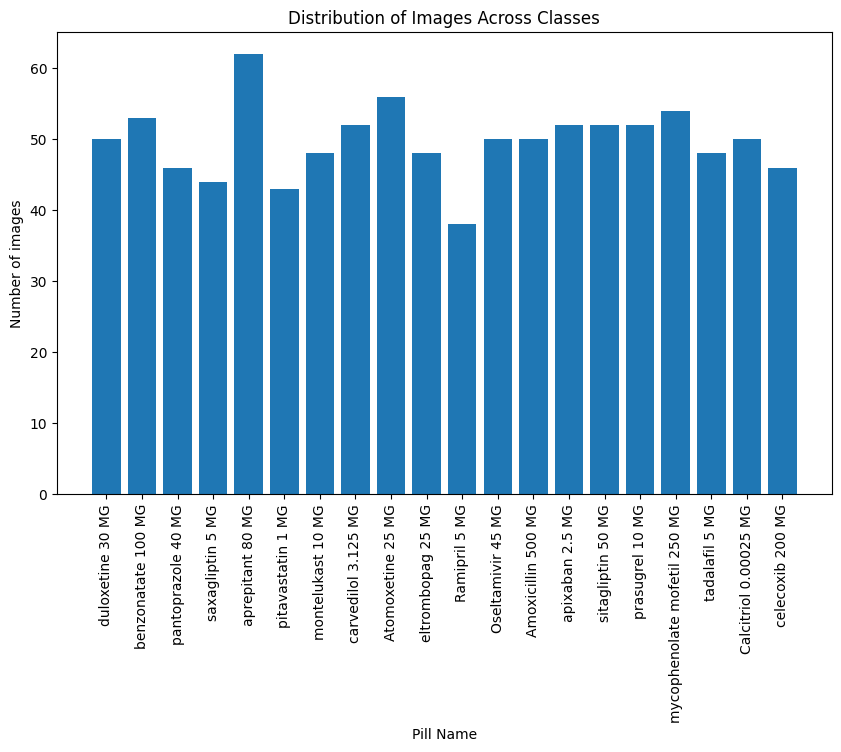

In [ ]:
# Count the number of images in each class
pill_names = []
num_images_per_pill = []
for pill_name in os.listdir(train):
    class_path = os.path.join(train, pill_name)
    if os.path.isdir(class_path):
        pill_names.append(pill_name)
        num_images_per_pill.append(len(os.listdir(class_path)))

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(pill_names, num_images_per_pill)
plt.xlabel('Pill Name')
plt.ylabel('Number of images')
plt.xticks(rotation=90)
plt.title('Distribution of Images Across Classes')
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import os

In [ ]:
# Define data transformations for data augmentation and normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [ ]:
# Define the data directories
# train_dir = './train'
# valid_dir = './valid'

# Create data loaders directly
image_datasets = {
    'train': datasets.ImageFolder(train, data_transforms['train']),
    'valid': datasets.ImageFolder(valid, data_transforms['valid'])
}


In [ ]:
dataloaders = {
    'train': torch.utils.data.DataLoader(image_datasets['train'], batch_size=4, shuffle=True, num_workers=4),
    'valid': torch.utils.data.DataLoader(image_datasets['valid'], batch_size=4, shuffle=True, num_workers=4),
}
dataset_sizes = {
    'train': len(image_datasets['train']),
    'valid': len(image_datasets['valid'])
}
print(dataset_sizes)

class_names = image_datasets['train'].classes
class_names


{'train': 994, 'valid': 274}


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


['Amoxicillin 500 MG',
 'Atomoxetine 25 MG',
 'Calcitriol 0.00025 MG',
 'Oseltamivir 45 MG',
 'Ramipril 5 MG',
 'apixaban 2.5 MG',
 'aprepitant 80 MG',
 'benzonatate 100 MG',
 'carvedilol 3.125 MG',
 'celecoxib 200 MG',
 'duloxetine 30 MG',
 'eltrombopag 25 MG',
 'montelukast 10 MG',
 'mycophenolate mofetil 250 MG',
 'pantoprazole 40 MG',
 'pitavastatin 1 MG',
 'prasugrel 10 MG',
 'saxagliptin 5 MG',
 'sitagliptin 50 MG',
 'tadalafil 5 MG']

In [ ]:
# Load the pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)

# Freeze all layers except the final classification layer
for name, param in model.named_parameters():
    if "fc" in name:  # Unfreeze the final classification layer
        param.requires_grad = True
    else:
        param.requires_grad = False

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # Use all parameters


# Move the model to the GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 43.7MB/s]


In [ ]:
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for phase in ['train', 'valid']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

print("Training complete!")

train Loss: 1.4615 Acc: 0.5654
valid Loss: 0.4804 Acc: 0.8759
train Loss: 1.0222 Acc: 0.7062
valid Loss: 0.3227 Acc: 0.9161
train Loss: 0.7918 Acc: 0.7575
valid Loss: 0.2259 Acc: 0.9489
train Loss: 0.7024 Acc: 0.8068
valid Loss: 0.1986 Acc: 0.9526
train Loss: 0.6422 Acc: 0.8089
valid Loss: 0.1184 Acc: 0.9672
train Loss: 0.6549 Acc: 0.8109
valid Loss: 0.1368 Acc: 0.9635
train Loss: 0.6119 Acc: 0.8199
valid Loss: 0.1086 Acc: 0.9781
train Loss: 0.5554 Acc: 0.8400
valid Loss: 0.0759 Acc: 0.9781
train Loss: 0.4924 Acc: 0.8592
valid Loss: 0.1012 Acc: 0.9672
train Loss: 0.4919 Acc: 0.8662
valid Loss: 0.0618 Acc: 0.9854
Training complete!


In [ ]:
# Save the model
torch.save(model.state_dict(), 'test_model.pth')

In [ ]:
import torch
from torchvision import models, transforms
from PIL import Image

# Load the saved model
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 1000)  # Adjust to match the original model's output units
model.load_state_dict(torch.load('test_model.pth'))
model.eval()

# Create a new model with the correct final layer
new_model = models.resnet18(pretrained=True)
new_model.fc = nn.Linear(new_model.fc.in_features, 2)  # Adjust to match the desired output units

# Copy the weights and biases from the loaded model to the new model
new_model.fc.weight.data = model.fc.weight.data[0:2]  # Copy only the first 2 output units
new_model.fc.bias.data = model.fc.bias.data[0:2]

In [ ]:
from google.colab import files
from PIL import Image
import torchvision.transforms as transforms

# Upload a file and save it to the Colab instance
uploaded = files.upload()

# Assuming you uploaded a single image file, get the path of that image
image_path = next(iter(uploaded))
print(f"Uploaded image: {image_path}")

# Load and preprocess the uploaded image
# Convert the image to RGB to ensure it has 3 channels
image = Image.open(image_path).convert('RGB')
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension


Saving download.jpeg to download (1).jpeg
Uploaded image: download (1).jpeg


In [ ]:
# Perform inference
with torch.no_grad():
    output = model(input_batch)

# Get the predicted class
predicted_class = output.max(1)

# Map the predicted class to the class name
class_names = ['Amoxicillin 500 MG',
 'Atomoxetine 25 MG',
 'Calcitriol 0.00025 MG',
 'Oseltamivir 45 MG',
 'Ramipril 5 MG',
 'apixaban 2.5 MG',
 'aprepitant 80 MG',
 'benzonatate 100 MG',
 'carvedilol 3.125 MG',
 'celecoxib 200 MG',
 'duloxetine 30 MG',
 'eltrombopag 25 MG',
 'montelukast 10 MG',
 'mycophenolate mofetil 250 MG',
 'pantoprazole 40 MG',
 'pitavastatin 1 MG',
 'prasugrel 10 MG',
 'saxagliptin 5 MG',
 'sitagliptin 50 MG',
 'tadalafil 5 MG']  # Make sure these class names match your training data
predicted_class_name = class_names[predicted_class.item()]

print(f'The predicted class is: {predicted_class_name}')


The predicted class is: montelukast 10 MG


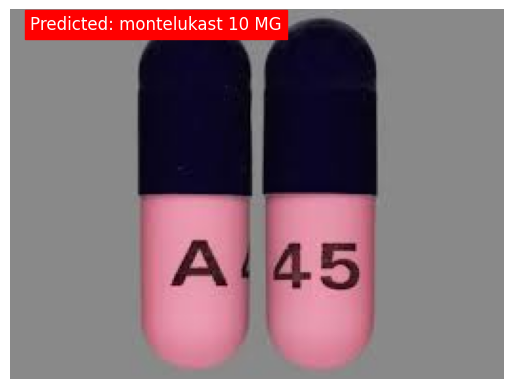

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='red')
plt.show()